# WATER WELLS IN TANZANIA.

## Overview and Problem Understanding.

After careful evaluation , it has been noted that most wells in tanzania have been experiencing trouble and are faulty. 
A team of 5 was given data and told to help Navesco Company (a water company in Tanzania) to come up with eloquent data and machine understanding to come up 
with different ways in which new and improved wells would help Tanzanians stop experiencing dcrought yet water is sufficient in the country

We were able to get data from a reliable source and it will inturn be of help to us coming up with different models with different results to help in the aid of this project.


Objectives of this project include the following :
1. Build a classifier to predict the condition of a water well and pitch to an NGO focused on locating wells needing repair.


## DATA UNDERSTANDING

The data provided was divided into three different stages and levels which include the following :
1. Testing data values
2. Training data values
3. Testing labels to aid in model creation.

We are required to join the data or use the data just as it is to come up with two or more different models and explanations for the problem .

## DATA EXPLORATION.

We will begin by firstly, importing necessary libraries that will allow us to open the data and get to know what is present in our files .

In [1]:
# import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


#import train and test data libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import  GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#metrics for baseline dataset
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# models to account for 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# reduce data memory 
from scipy.sparse import csr_matrix


In [2]:
# open our test set data i.e all files and see the data info within the dataset
data1 = pd.read_csv("training_set_values.csv")
pd.DataFrame(data1)
data1


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
#open the test variables (i.e labels)
data2 = pd.read_csv('training_set_labels.csv') 
data2

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


Using the data above , we can now check the counts present for all values i.e functional,non-functional and spoilt wells .

In [4]:
#join the columns with the training data that resonates.
data2.value_counts()

df = pd.merge(data1, data2, how = 'left', on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
df1 = df.copy()

In [7]:
df1 = df1.sample(frac=0.4, random_state=42)
df1['permit'] = df1['permit'].dropna()
df1


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
2980,37098,0.0,2012-10-09,Rural Water Supply And Sanitat,0,DWE,31.985658,-3.596360,Kasela,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
5246,14530,0.0,2012-11-03,Halmashauri Ya Manispa Tabora,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Mbugani,0,...,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
22659,62607,10.0,2013-02-25,Siter Fransis,1675,DWE,35.488289,-4.242048,Kwa Leosi,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
39888,46053,0.0,2011-08-13,Kkkt,0,KKKT,33.140828,-9.059386,Jangi,0,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
13361,47083,50.0,2013-02-08,Wateraid,1109,SEMA,34.217077,-4.430529,Mkima,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46912,50526,0.0,2013-02-19,Adra,1564,Adra,35.522134,-4.480657,Shuleni,0,...,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
41173,67498,0.0,2013-02-17,Netherlands,0,DWE,33.684507,-3.197790,Bunang'Hwale,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
37745,71958,10.0,2011-02-27,Dwe,-2,DWE,38.647507,-7.869125,Zahanati,0,...,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
14756,52297,0.0,2013-03-26,Losaa-kia Water Supply,1231,Losaa-Kia water supp,37.114494,-3.215041,Kwa Grace Soka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


## DATA PROCESSING

Using the dataset created , we can go ahead and begin removal of duplicates and null values and even columns that may not be of help especially with our objectives in play .

In [8]:
#checking for duplicates
df1.duplicated().sum()

0

our observation is that no data is duplicated and all is well with our dataset.


In [9]:
#check for null values 
df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    1485
gps_height                   0
installer                 1492
longitude                    0
latitude                     0
wpt_name                     1
num_private                  0
basin                        0
subvillage                 143
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            1319
recorded_by                  0
scheme_management         1553
scheme_name              11516
permit                    1226
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Using the details above, we find out that most columns are  not going to be of help especially with the objectives present .So inorder to have clear colummns , we would be required to drop the unwanted columnns and also remove any null values from the needed columns.

In [10]:
#check the number of columns 
df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Due to the presence of many unrequired columns , we would need to impute them and drop the unwanted columns 


In [11]:
# differentiate the numeric columns to the categorical columns
df1.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [12]:
df1.select_dtypes(include = ['int64', 'float64']).columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [13]:
# drop the unrequired columns to avoid data duplication 
columns_to_drop = ['date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_group', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'waterpoint_type', 'num_private', 
 'region_code', 'district_code']

df1 = df1.drop(columns_to_drop, axis=1)

In [14]:
df2 = df1.copy().dropna()
df2.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
2980,37098,0.0,0,DWE,31.985658,-3.596360,Lake Tanganyika,Shinyanga,0,True,...,True,0,other,user-group,unknown,soft,dry,groundwater,other,non functional
5246,14530,0.0,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Lake Tanganyika,Tabora,0,True,...,True,0,handpump,user-group,never pay,milky,insufficient,groundwater,hand pump,functional
22659,62607,10.0,1675,DWE,35.488289,-4.242048,Internal,Manyara,148,True,...,True,2008,gravity,user-group,per bucket,soft,insufficient,groundwater,communal standpipe,functional
39888,46053,0.0,0,KKKT,33.140828,-9.059386,Lake Rukwa,Mbeya,0,False,...,False,0,handpump,user-group,never pay,soft,seasonal,groundwater,hand pump,non functional
13361,47083,50.0,1109,SEMA,34.217077,-4.430529,Internal,Singida,235,True,...,True,2011,motorpump,user-group,per bucket,soft,enough,groundwater,communal standpipe,functional


## EDA ANALYSIS

### UNIVARIATE ANALYSIS

Now that the data is all cleaned and without any nnull vaalues , we will begin with the analysis section of the project . Firstly, we begin with different singular analysis between different columns and relations.

In [15]:
df2.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [16]:
#Numerical analysis('amount_tsh')
print(df2['amount_tsh'].describe())

count     19490.000000
mean        362.575947
std        2897.612079
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max      200000.000000
Name: amount_tsh, dtype: float64


In [17]:
#categorical data ('payment_type')
print(df2['payment_type'].describe())

count         19490
unique            7
top       never pay
freq           8365
Name: payment_type, dtype: object


In [18]:
#limiting the number of categories present in our training dataset or our predictor .
# Limit to the  top 4 most frequent categories
top_categories = df2['waterpoint_type_group'].value_counts().nlargest(4).index

# Filter the data to only include the top categories
df_filtered = df2[df2['waterpoint_type_group'].isin(top_categories)]
df_filtered


,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
2980,37098,0.0,0,DWE,31.985658,-3.596360,Lake Tanganyika,Shinyanga,0,True,...,True,0,other,user-group,unknown,soft,dry,groundwater,other,non functional
5246,14530,0.0,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Lake Tanganyika,Tabora,0,True,...,True,0,handpump,user-group,never pay,milky,insufficient,groundwater,hand pump,functional
22659,62607,10.0,1675,DWE,35.488289,-4.242048,Internal,Manyara,148,True,...,True,2008,gravity,user-group,per bucket,soft,insufficient,groundwater,communal standpipe,functional
39888,46053,0.0,0,KKKT,33.140828,-9.059386,Lake Rukwa,Mbeya,0,False,...,False,0,handpump,user-group,never pay,soft,seasonal,groundwater,hand pump,non functional
13361,47083,50.0,1109,SEMA,34.217077,-4.430529,Internal,Singida,235,True,...,True,2011,motorpump,user-group,per bucket,soft,enough,groundwater,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46912,50526,0.0,1564,Adra,35.522134,-4.480657,Internal,Manyara,786,True,...,True,2008,gravity,parastatal,never pay,soft,dry,groundwater,communal standpipe,non functional
41173,67498,0.0,0,DWE,33.684507,-3.197790,Lake Victoria,Shinyanga,0,True,...,False,0,handpump,user-group,other,soft,enough,groundwater,hand pump,functional
37745,71958,10.0,-2,DWE,38.647507,-7.869125,Rufiji,Pwani,1,True,...,True,1999,motorpump,user-group,per bucket,salty,insufficient,groundwater,communal standpipe,non functional
14756,52297,0.0,1231,Losaa-Kia water supp,37.114494,-3.215041,Pangani,Kilimanjaro,1,True,...,True,1999,gravity,user-group,monthly,soft,enough,groundwater,communal standpipe,functional


Text(0.5, 1.0, ' ')

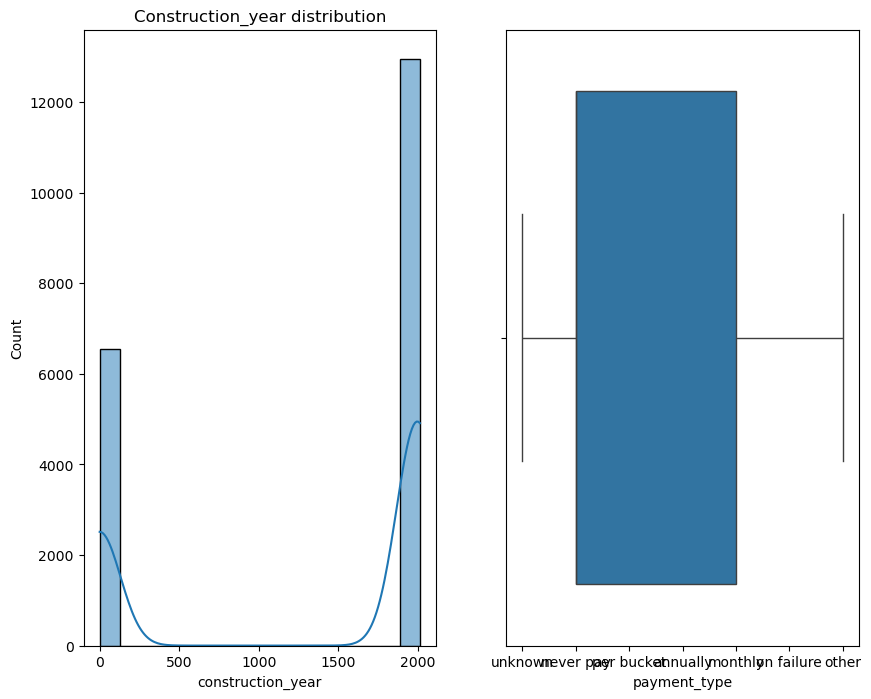

In [19]:
 #histogram for ('construction_year')
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
sns.histplot(df2['construction_year'], kde=True)
plt.title('Construction_year distribution')

#Boxplot for 'waterpoint type  group'
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['payment_type'])
plt.title(' ')



### BIVARIATE ANALYSIS

Now on to bivariate analysis where we analyse different relationships between two data types 
i.e 1. numerical vs categorical
    2. numerical vs numerical
    3. categorical vs categorical


In [20]:
df2.describe()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,19490.000000,19490.000000,19490.000000,19490.000000,1.949000e+04,19490.000000,19490.000000
mean,37231.279785,362.575947,699.905798,34.163893,-5.679083e+00,176.779117,1326.558697
std,21448.342293,2897.612079,701.891554,6.430768,2.872993e+00,503.057186,942.904161
min,3.000000,0.000000,-90.000000,0.000000,-1.158630e+01,0.000000,0.000000
25%,18561.250000,0.000000,0.000000,33.032037,-8.218093e+00,0.000000,0.000000
50%,37414.500000,0.000000,461.500000,35.197609,-4.985169e+00,30.000000,1986.000000
75%,55686.750000,50.000000,1336.000000,37.326356,-3.330653e+00,200.000000,2005.000000
max,74246.000000,200000.000000,2623.000000,40.322805,-2.000000e-08,30500.000000,2013.000000


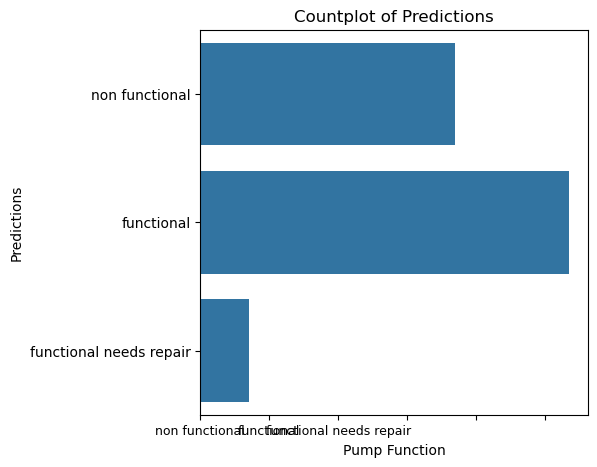

In [21]:
# Ploting distribution of target variable.
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df2['status_group'])
x_labels = df2['status_group'].unique()

# Add labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Function')
ax.set_xticklabels(x_labels, fontsize=9)
plt.ylabel('Predictions')
plt.show()



With this , we can now note that the functional wells are the ones with a high rate comared to those non-fucntional having a smaller ratio.

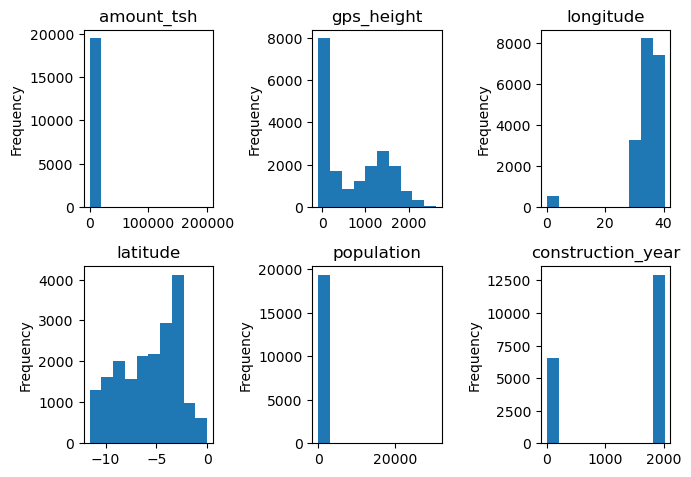

In [22]:
#for categorical data , we can use a histogram to represent 
continuous = ['amount_tsh','gps_height','longitude','latitude','population','construction_year']
fig = plt.figure(figsize=(7, 7))
for i, col in enumerate(continuous):
    ax = plt.subplot(3, 3, i+1)
    df2[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()

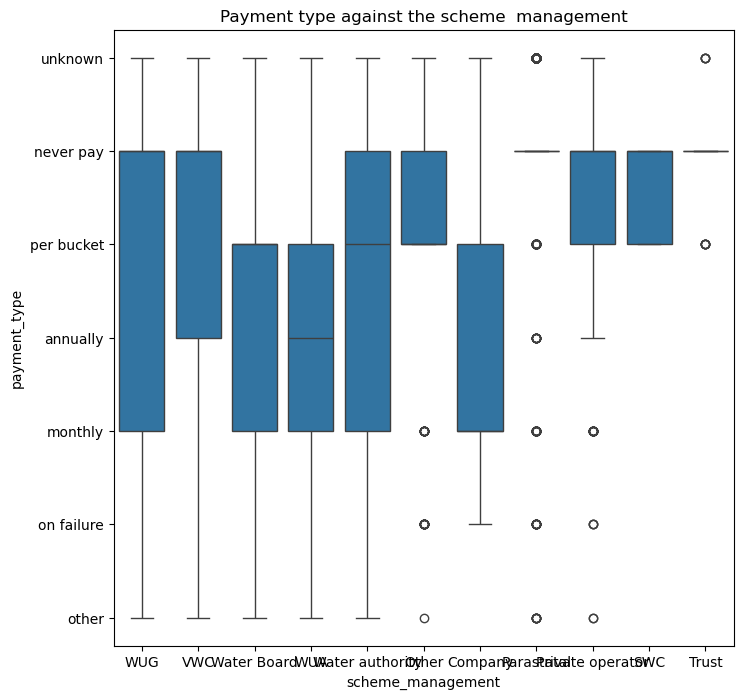

In [23]:
# Box plot for 'scheme_management' grouped by 'payment_type'
plt.figure(figsize=(8, 8))
sns.boxplot(x='scheme_management', y='payment_type', data=df_filtered)
plt.title('Payment type against the scheme  management')
plt.show()

In [24]:
#RELATIONSHIP BETWEEN COMPANY FUNDING AND AMOUNT PROVIDED
grouped = df.groupby('installer')['amount_tsh'].describe()
print(grouped)


                count        mean          std   min    25%    50%    75%  \
installer                                                                   
-                 3.0    0.000000     0.000000   0.0    0.0    0.0    0.0   
0               777.0  243.885457  2658.671884   0.0    0.0   50.0   50.0   
A.D.B             1.0    0.000000          NaN   0.0    0.0    0.0    0.0   
AAR               4.0    0.000000     0.000000   0.0    0.0    0.0    0.0   
ABASIA           29.0  355.172414   222.944911   0.0  100.0  500.0  500.0   
...               ...         ...          ...   ...    ...    ...    ...   
water board       2.0    0.000000     0.000000   0.0    0.0    0.0    0.0   
wizara ya maji    2.0    0.000000     0.000000   0.0    0.0    0.0    0.0   
world             4.0    0.000000     0.000000   0.0    0.0    0.0    0.0   
world banks       1.0   50.000000          NaN  50.0   50.0   50.0   50.0   
world vision      1.0    0.000000          NaN   0.0    0.0    0.0    0.0   

### MULTIVARIATE ANALYSIS

After careful bivariate and univariate analysis , we can begin on multivariate to ensure complete analysis on the data present.

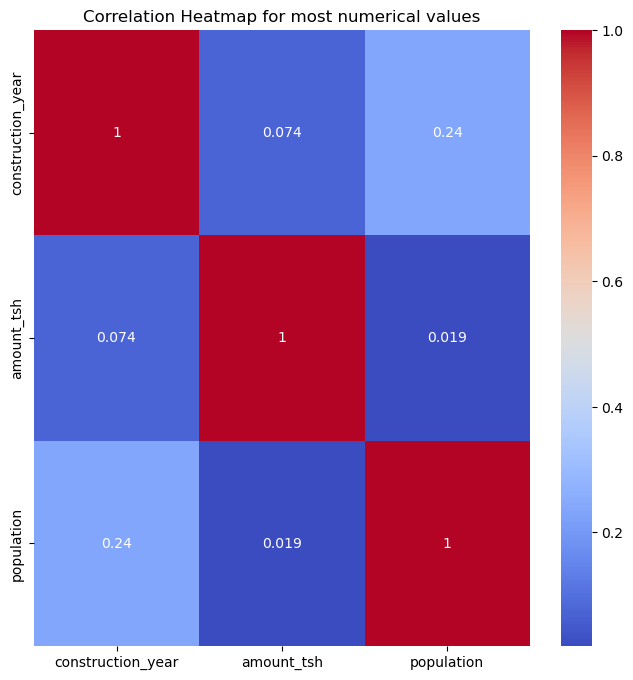

In [25]:
#for the numerical details , we will use a correlation heatmap
correlation_matrix = df_filtered[['construction_year', 'amount_tsh','population']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for most numerical values')
plt.show()

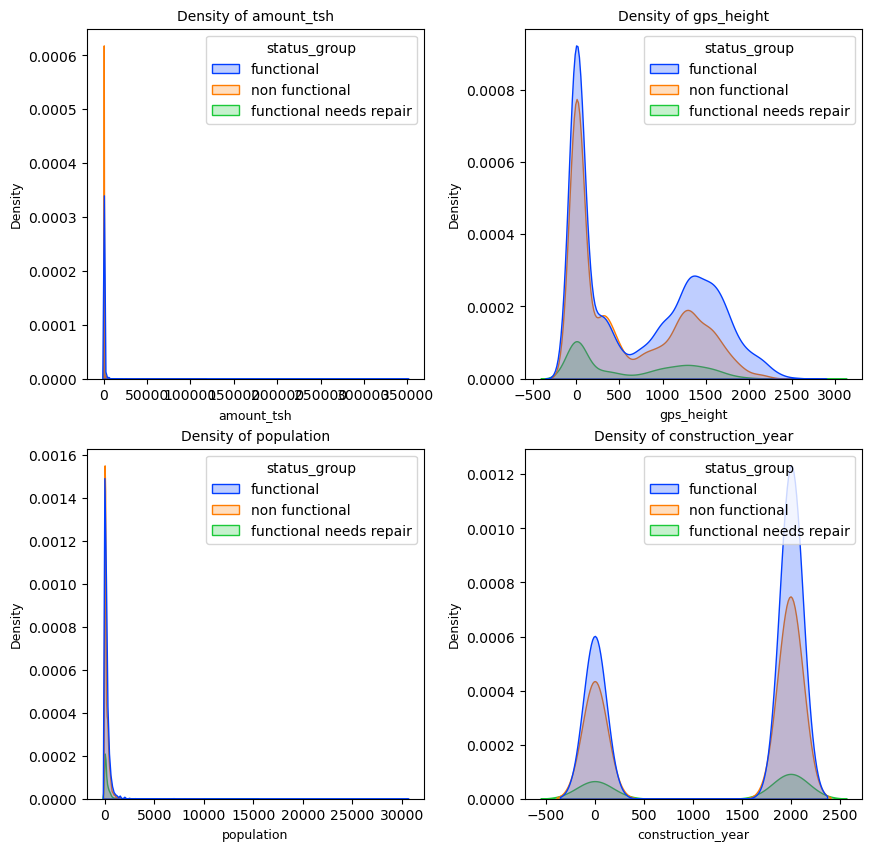

In [26]:
# check the target variable against continous data values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)  # Increase hspace and wspace

# Create count bar plots for continuous variables
continuous = ['amount_tsh','gps_height',
              'population','construction_year']

for i, column in enumerate(continuous):
    row, col = i // 2, i % 2
    sns.kdeplot(data=df, x=column, hue='status_group', palette='bright', 
                fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Density of {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=9)
    axes[row, col].set_ylabel('Density', fontsize=9)

plt.show()

Now that we have been successful in data cleaning and eda analysis, we can now begin with the machine learning section .This involves now getting into the nitty gritty section of the project .Here we can evaluate the objectives and come up with different observations that will help us gain more insight into the data .


### FEATURE AND PREDICTOR 


In [27]:
# choosing the target(status_group) and all others as the target variable
y = df2['status_group']

X = df2.drop('status_group', axis=1)

X.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group
2980,37098,0.0,0,DWE,31.985658,-3.596360,Lake Tanganyika,Shinyanga,0,True,WUG,True,0,other,user-group,unknown,soft,dry,groundwater,other
5246,14530,0.0,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Lake Tanganyika,Tabora,0,True,VWC,True,0,handpump,user-group,never pay,milky,insufficient,groundwater,hand pump
22659,62607,10.0,1675,DWE,35.488289,-4.242048,Internal,Manyara,148,True,Water Board,True,2008,gravity,user-group,per bucket,soft,insufficient,groundwater,communal standpipe
39888,46053,0.0,0,KKKT,33.140828,-9.059386,Lake Rukwa,Mbeya,0,False,VWC,False,0,handpump,user-group,never pay,soft,seasonal,groundwater,hand pump
13361,47083,50.0,1109,SEMA,34.217077,-4.430529,Internal,Singida,235,True,WUA,True,2011,motorpump,user-group,per bucket,soft,enough,groundwater,communal standpipe


## MODEL AND MACHINE LEARNING.

In [28]:
#convert categorical features and binary features
categ_col = ['installer', 'basin', 'region', 'scheme_management', 
           'extraction_type_class', 'management_group', 'payment_type', 
           'water_quality', 'quantity_group', 'source_class', 
           'waterpoint_type_group']

cont_col = ['amount_tsh','gps_height','longitude','latitude','population','construction_year']

binary_col = ['public_meeting', 'permit']

Using the grouped columns into either category, binary or count , we can now get dummies for the categorical columns present.

In [29]:
#using label encoding to get the integral values for the categorical values 
X = pd.get_dummies(X , columns = categ_col)
X['permit'] = X['permit'].dropna()
# Print X
X

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,installer_0,...,quantity_group_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
2980,37098,0.0,0,31.985658,-3.596360,0,True,True,0,False,...,False,True,False,False,False,False,False,False,False,True
5246,14530,0.0,0,32.832815,-4.944937,0,True,True,0,False,...,False,True,False,False,False,False,False,True,False,False
22659,62607,10.0,1675,35.488289,-4.242048,148,True,True,2008,False,...,False,True,False,False,False,True,False,False,False,False
39888,46053,0.0,0,33.140828,-9.059386,0,False,False,0,False,...,False,True,False,False,False,False,False,True,False,False
13361,47083,50.0,1109,34.217077,-4.430529,235,True,True,2011,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46912,50526,0.0,1564,35.522134,-4.480657,786,True,True,2008,False,...,False,True,False,False,False,True,False,False,False,False
41173,67498,0.0,0,33.684507,-3.197790,0,True,False,0,False,...,False,True,False,False,False,False,False,True,False,False
37745,71958,10.0,-2,38.647507,-7.869125,1,True,True,1999,False,...,False,True,False,False,False,True,False,False,False,False
14756,52297,0.0,1231,37.114494,-3.215041,1,True,True,1999,False,...,False,True,False,False,False,True,False,False,False,False


In [30]:
X

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,installer_0,...,quantity_group_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
2980,37098,0.0,0,31.985658,-3.596360,0,True,True,0,False,...,False,True,False,False,False,False,False,False,False,True
5246,14530,0.0,0,32.832815,-4.944937,0,True,True,0,False,...,False,True,False,False,False,False,False,True,False,False
22659,62607,10.0,1675,35.488289,-4.242048,148,True,True,2008,False,...,False,True,False,False,False,True,False,False,False,False
39888,46053,0.0,0,33.140828,-9.059386,0,False,False,0,False,...,False,True,False,False,False,False,False,True,False,False
13361,47083,50.0,1109,34.217077,-4.430529,235,True,True,2011,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46912,50526,0.0,1564,35.522134,-4.480657,786,True,True,2008,False,...,False,True,False,False,False,True,False,False,False,False
41173,67498,0.0,0,33.684507,-3.197790,0,True,False,0,False,...,False,True,False,False,False,False,False,True,False,False
37745,71958,10.0,-2,38.647507,-7.869125,1,True,True,1999,False,...,False,True,False,False,False,True,False,False,False,False
14756,52297,0.0,1231,37.114494,-3.215041,1,True,True,1999,False,...,False,True,False,False,False,True,False,False,False,False


Now I will continue with train and test splitting

In [31]:
X_train , X_test , y_train ,y_test = train_test_split(X,y, test_size=0.3,random_state=43)

In [32]:
# Check for NaN values in the DataFrame
print(X.isna().sum())  # Count of NaNs per column


id                                          0
amount_tsh                                  0
gps_height                                  0
longitude                                   0
latitude                                    0
                                           ..
waterpoint_type_group_communal standpipe    0
waterpoint_type_group_dam                   0
waterpoint_type_group_hand pump             0
waterpoint_type_group_improved spring       0
waterpoint_type_group_other                 0
Length: 1254, dtype: int64


Using this we can now begin on model training

In [33]:
#check the training data information
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,13643.000000,13643.000000,13643.000000,13643.000000,1.364300e+04,13643.000000,13643.000000
mean,37204.715092,372.713626,696.928242,34.159379,-5.676880e+00,177.352782,1325.524445
std,21375.562558,3159.961370,699.330855,6.483429,2.878076e+00,530.804887,943.309685
min,4.000000,0.000000,-90.000000,0.000000,-1.158630e+01,0.000000,0.000000
25%,18713.000000,0.000000,0.000000,33.037126,-8.223847e+00,0.000000,0.000000
50%,37251.000000,0.000000,457.000000,35.240377,-4.996336e+00,25.000000,1986.000000
75%,55598.500000,50.000000,1332.000000,37.342572,-3.328403e+00,200.000000,2005.000000
max,74238.000000,200000.000000,2585.000000,40.322625,-2.000000e-08,30500.000000,2013.000000


I will have to scale it due to the incoherent values and scales present in our data and to also check the performance  of the model

In [34]:
#check for the metrics list as a global variable 
metrics_list =[]

class Metrics:
    def model_score(self, model, y_true, y_pred):
        # Print classification report, accuracy, precision, recall, f1_score 
        print(classification_report(y_true, y_pred))
        print("Overall accuracy score", accuracy_score(y_true, y_pred))
        print("Overall precision score", precision_score(y_true, y_pred, average='weighted'))
        print("Overall recall score", recall_score(y_true, y_pred, average='weighted'))
        print("Overall F1-score", f1_score(y_true, y_pred, average='weighted'))


     # Print a confusion matrix    
        cnf_matrix = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)
        print('\nConfusion Matrix')       
        return disp.plot()

    # Create a list of model metrics
    def get_metrics(self, model_name, model, y_true, y_pred):  #y_test, X_test, model
        metrics = {}  
        metrics['model_name'] = model_name
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['f1 score'] = f1_score(y_true, y_pred, average='weighted')
        metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics_list.append(metrics)
        return metrics_list

## PIPELINE MODELLING

In [35]:
# we can no move onto the next step of pipeline modelling 
pipe_logistic = Pipeline([('ss', StandardScaler()),
                          ('lr' , LogisticRegression(random_state=42))])

#pipeline classifier for Decision tree 
pipe_tree = Pipeline([('ss', StandardScaler()),
                          ('tree' , DecisionTreeClassifier(random_state=42))])

#pipeline classifier for the KNN 
pipe_knn = Pipeline([('ss', StandardScaler()),
                          ('knn' , KNeighborsClassifier)])

Now that we have already chosen the models to create using the original data above , we can now move to building the models one at a time .

### Regression Model
Here we can go ahaead and instantiate the regression model and fit in our data and the model classifiers 



In [36]:
# Fitting the model
logistic_model = pipe_logistic.fit(X_train , y_train)

#print the accuracy levels for the test data 
pipe_logistic.score(X_test,y_test)

0.7400376261330597

                         precision    recall  f1-score   support

             functional       0.74      0.87      0.80      3197
functional needs repair       0.45      0.15      0.22       461
         non functional       0.76      0.67      0.71      2189

               accuracy                           0.74      5847
              macro avg       0.65      0.56      0.58      5847
           weighted avg       0.73      0.74      0.72      5847

Overall accuracy score 0.7400376261330597
Overall precision score 0.7257561850132295
Overall recall score 0.7400376261330597
Overall F1-score 0.7225622126097963

Confusion Matrix


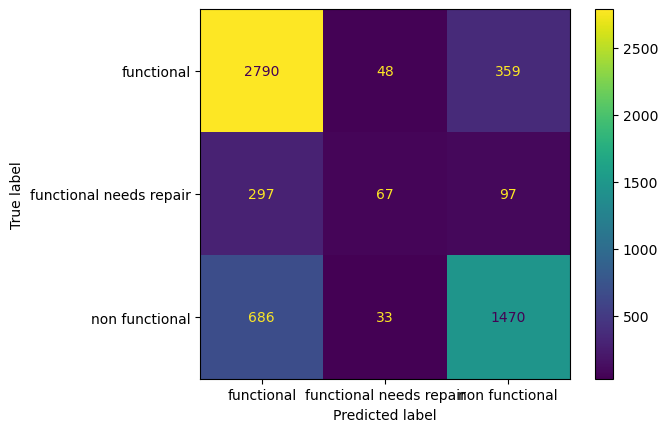

In [37]:
# Print model metrics
# Predict target
y_pred = logistic_model .predict(X_test)

# Create metrics object
score_metrics = Metrics()

# Print classification report, scores, and confusion matrix
score_metrics.model_score(logistic_model, y_test, y_pred)

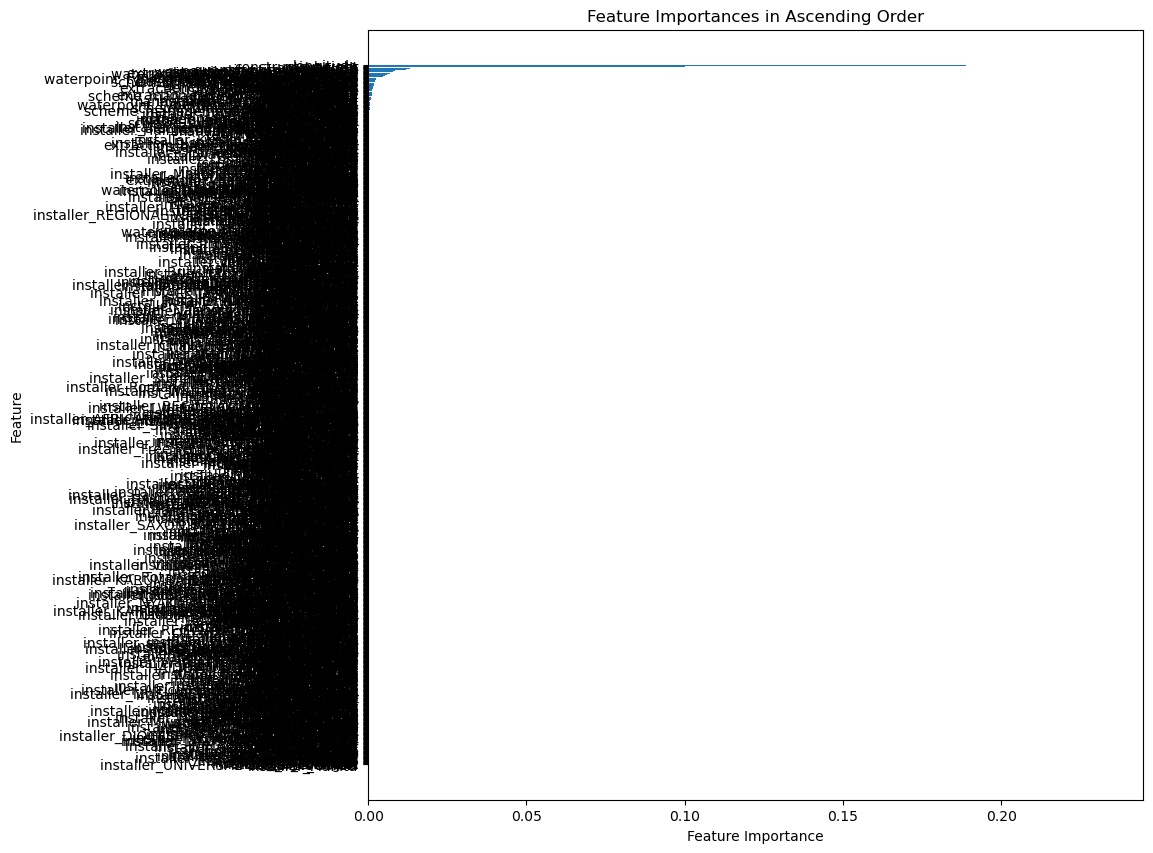

In [38]:
# Plot feature importances for logistic ternary classifier

# Fit a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Retrieve the coefficients for each feature and class
coefficients = logistic_model.coef_

# Calculate feature importances based on the absolute values of coefficients
importances = np.abs(coefficients)

# Normalize the importances within each class
importances /= np.sum(importances, axis=1)[:, np.newaxis]

# Aggregate importances across classes for an overall importance measure
# Mean importance across classes
overall_importance = np.mean(importances, axis=0)

# Sort and plot feature importances
sorted_indices = overall_importance.argsort()
sorted_feature_names = X_train.columns[sorted_indices]

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_indices)), overall_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Ascending Order')
plt.show()

BASELINE DECISION TREE MODEL

In [39]:
# we start witha decision tree classifier
# Fit the decision tree classifier to training data
dt_model = pipe_tree.fit(X_train, y_train)

# Print the accuracy on test set
pipe_tree.score(X_test, y_test)

0.7094236360526766

                         precision    recall  f1-score   support

             functional       0.77      0.75      0.76      3197
functional needs repair       0.31      0.30      0.30       461
         non functional       0.71      0.73      0.72      2189

               accuracy                           0.71      5847
              macro avg       0.59      0.59      0.59      5847
           weighted avg       0.71      0.71      0.71      5847

Overall accuracy score 0.7094236360526766
Overall precision score 0.7089129916423678
Overall recall score 0.7094236360526766
Overall F1-score 0.7090454698669827

Confusion Matrix


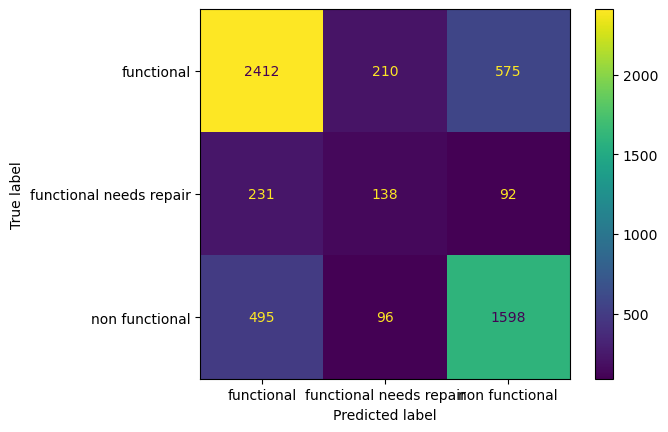

In [40]:
# Print model metrics
# Predict target
y_pred = dt_model.predict(X_test)

# Create metrics object
score_metrics = Metrics()

# Print classification report, scores, and confusion matrix
score_metrics.model_score(dt_model, y_test, y_pred)

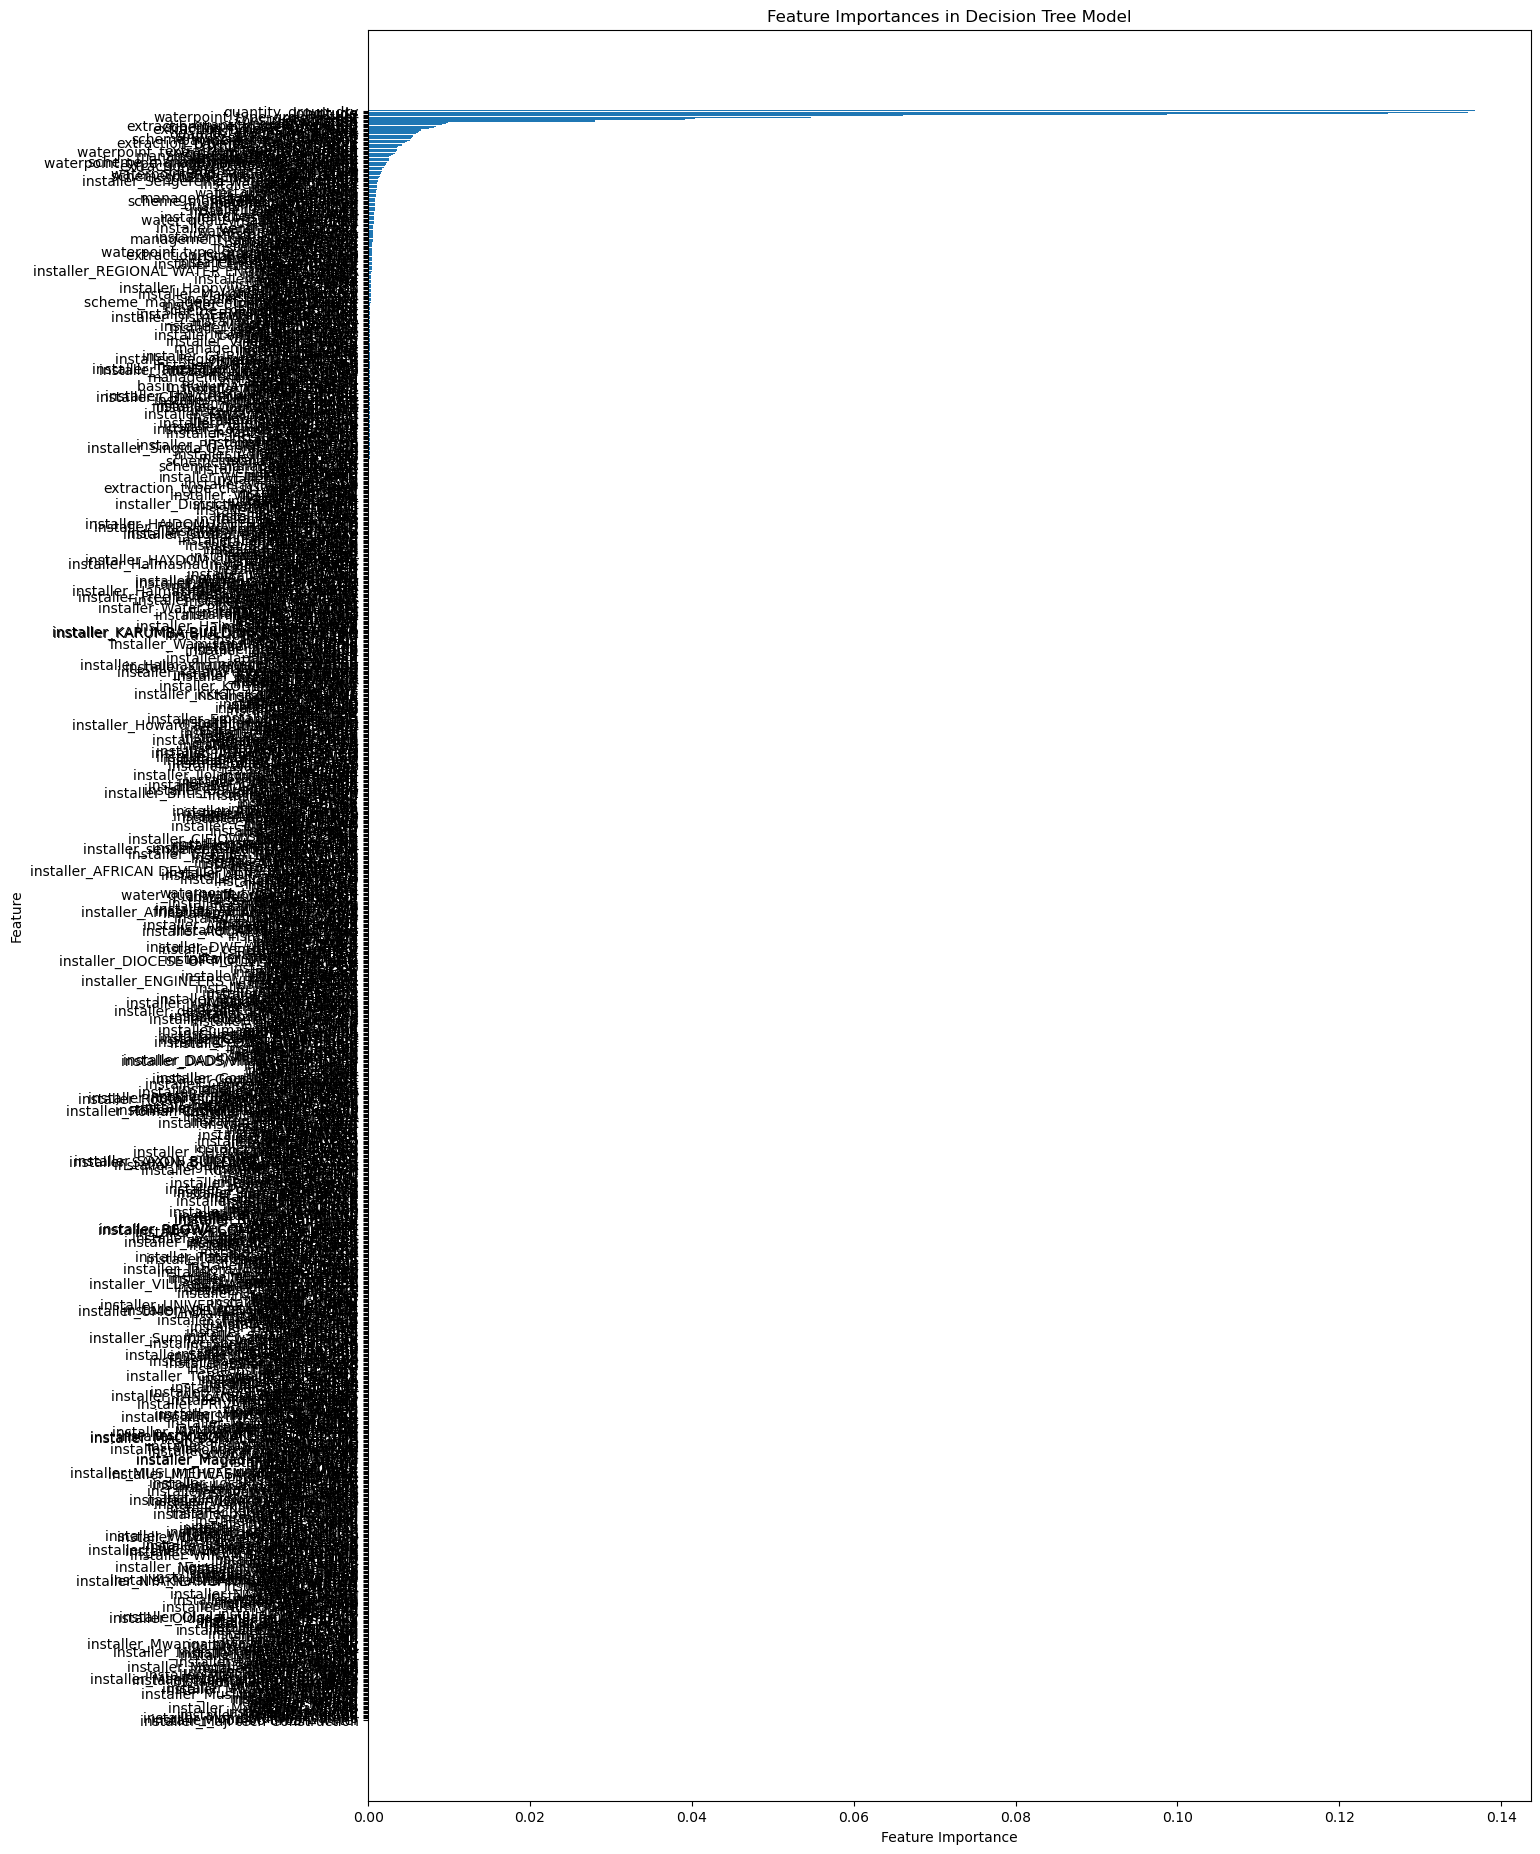

In [41]:
# Feature importance plot for decision tree classifier

# Fit the decision tree classifier to training data
dt_model_f = pipe_tree.named_steps['tree'].fit(X_train, y_train)

# Get feature importances from the decision tree
feature_importances = dt_model_f.feature_importances_

n_features = X_train.shape[1]
sorted_indices = feature_importances.argsort()
# Sort feature names based on importance order
sorted_feature_names = X.columns[sorted_indices]

plt.figure(figsize=(15, 23))
plt.barh(range(n_features), feature_importances[sorted_indices], align='center')
plt.yticks(range(n_features), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model');

From the 2 baseline models, we can observe that the Logistic regression has the highest accuracy score of about 0.773 and also the highest f1-score of about 0.766.

The plots of features importances show that the 10 most influential features are:<br>
i.) Longitude<br>
ii.) Latitude<br>
iii.) Quantity_group<br>
iv.) gps height<br>
v.) Population<br>
vi.) Water type group<br>
vii.) Contruction year<br>
viii.) Payment type or method<br>
ix.) Extraction type class<br>
x.) amount_tsh

### CROSS VALIDATION MODELS
K-fold cross validation may improve on the performance of training and test splits because it splits the entire dataset into K equal sections of data. At each iteration, it fits the model on different sections of the data and runs a test on the remaining test set, which must also be different for each iteration.

The scores are finally averaged out, which means below-average and above-average score may cancel each other out to give a more realistic score.

In [42]:
# Create a Function for Cross Validation test
def cross_val_test(K_folds, model_instance, X, y):
    
    # Plot a distribution of train and test accuracies over a range of K folds
    train_accuracy = []
    test_accuracy = []

    for fold in K_folds:
        # Instantiate classifier model
        model = model_instance

        # Perform cross-validation on full dataset to evaluate model performance
        cv_scores = cross_validate(model, X, y, cv=fold, return_train_score=True)

        # Find mean train and test scores
        mean_train_score = np.mean(cv_scores['train_score'])
        mean_test_score = np.mean(cv_scores['test_score'])

        # Append the lists for mean scores
        train_accuracy.append(mean_train_score)
        test_accuracy.append(mean_test_score)

    # Plot the mean train and test scores against K fold
    plt.plot(K_folds, train_accuracy, label='Train score')
    plt.plot(K_folds, test_accuracy, label='Test score')
    plt.xlabel('Cross Validation Fold')
    plt.ylabel('Accuracy Score')
    plt.legend();
    return f"This is the Cross Validation Test for {model_instance}"

## LOGISTIC REGRESSION CROSS VALIDAITION

'This is the Cross Validation Test for LogisticRegression(random_state=42)'

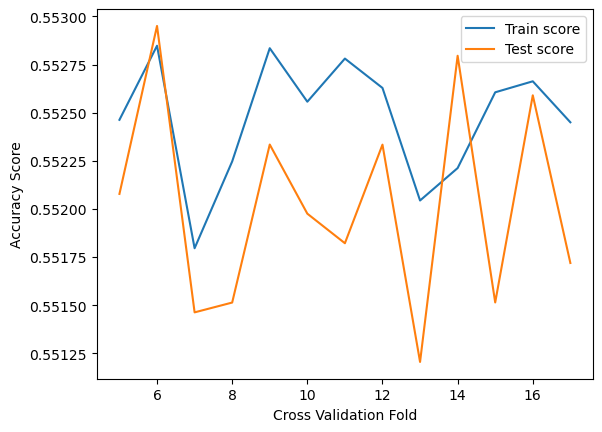

In [43]:
# Plot a distribution of train and test accuracies over a range of K folds
#
cross_val_test(range(5, 18), LogisticRegression(random_state=42), X, y)

### DECISION TREE CLASSIFIER WITH CROSS VALIDATION

'This is the Cross Validation Test for DecisionTreeClassifier(random_state=42)'

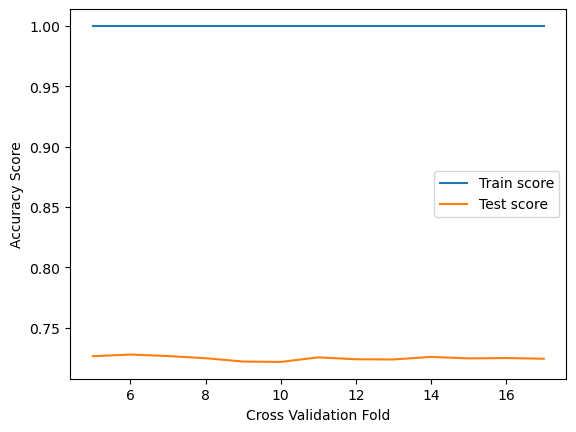

In [44]:
cross_val_test(range(5,18), DecisionTreeClassifier(random_state=42),X ,y)

From the distribution of accuracy across different K folds, we observe the test accuracy score closely matches that of the train score. Therefore, the model is not overfitting. 
Both train and test accuracy scores are at their highest and closest at K-fold=6.

However, the accuracy scores are lower than that of the baseline logistic regression model. This shows that cross validation does not improve performance.

### HANDLING CLASS IMBALANCE

In [45]:
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

status_group
functional                 7492
non functional             5202
functional needs repair     949
Name: count, dtype: int64


status_group
functional                 7492
non functional             7492
functional needs repair    7492
Name: count, dtype: int64


In [46]:
# Print the baseline logistic accuracy and f1 score on test set
y_pred = logistic_model.predict(X_test)
print("Baseline Logistic Regression Accuracy", logistic_model.score(X_test, y_test))
print("Baseline Logistic Regression F1-score", f1_score(y_test, y_pred, average='weighted'))

# Print the baseline decision tree accuracy and f1 score on test set
y_pred = dt_model.predict(X_test)
print("Baseline Decision Tree Accuracy", pipe_tree.score(X_test, y_test))
print("Baseline Decision Tree F1-score", f1_score(y_test, y_pred, average='weighted'))


# Fit the logistic regression model on resampled data
log_model_resampled = pipe_logistic.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model_resampled.predict(X_test)

# Fit the decision tree classifier on resampled data
dt_model_resampled = pipe_tree.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model_resampled.predict(X_test)


# Print the accuracy and f1 scores on SMOTE sample
print("Logistic Regression Accuracy with SMOTE", log_model_resampled.score(X_test, y_test))
print("Logistic Regression F1-score with SMOTE", f1_score(y_test, y_pred_log, 
                                                          average='weighted'))
print("Decision Tree Accuracy with SMOTE", dt_model_resampled.score(X_test, y_test))
print("Decision Tree F1-score with SMOTE", f1_score(y_test, y_pred_dt, 
                                                          average='weighted'))


Baseline Logistic Regression Accuracy 0.5500256541816316
Baseline Logistic Regression F1-score 0.46841064174267905
Baseline Decision Tree Accuracy 0.383615529331281
Baseline Decision Tree F1-score 0.4429512056722699
Logistic Regression Accuracy with SMOTE 0.737130152214811
Logistic Regression F1-score with SMOTE 0.7233501724332839
Decision Tree Accuracy with SMOTE 0.7080554130323242
Decision Tree F1-score with SMOTE 0.708735081762939


### RANDOM FOREST CLASSIFICATION

### BASELINE RANDOM CLASSIFIER
I will start by instantiating and fitting a Random Forest classifier with default parameters.

In [47]:
# Define a pipeline for Random Forest classification
pipe_rf = Pipeline([('ss', StandardScaler()), 
                    ('rf', RandomForestClassifier(random_state=42))])

# Fit the Random Forest pipeline on training data
rf_model = pipe_rf.fit(X_train, y_train)

# Training accuracy score
print("Random Forest Accuracy on Training Set", rf_model.score(X_train, y_train))
      
# Test accuracy score 
print("Random Forest Accuracy on Test Set", rf_model.score(X_test, y_test))

Random Forest Accuracy on Training Set 0.9998534046763908
Random Forest Accuracy on Test Set 0.7762955361723961


In [48]:
#Print model metrics
# Predict target
y_pred = rf_model.predict(X_test)

# Create metrics object
score_metrics = Metrics()

# Print model metrics
metrics_list=[]
score_metrics.get_metrics("Random Forest", rf_model, y_test, y_pred)

[{'model_name': 'Random Forest',
  'accuracy': 0.7762955361723961,
  'f1 score': 0.7662198899017006,
  'precision': 0.7655272454665789,
  'recall': 0.7762955361723961}]

The baseline Random Forest classifier performance is the highest so far at about 0.776 on the test set. 
However, the training set accuracy is 0.999, which indicates that the model is overfitting.

Next I will perform a cross validation test on the model and note the change in performance.

Cross validation has improved accuracy from about 0.777 to about 0.782 but the model is still overfitting.

### CONCLUSION

From the analytics section, I observed the following:

### `Relationship Between Pump Functionality and Continuous Variables`

1. For the total static head feature (amount_tsh), waterpoints with zero static head have the highest density of pumps overall. Also, among the three pump classes at this point, non-functional pumps have the highest density followed by functional pumps. Functional-needs-repair pumps are the least. However, the dataset has a high number **(59.2%)** of pumps with zero static head and there is no information about the high occurrence. 

>Also, while it's expected that a pump with zero static head means that it is faulty, some of these pumps are functional and  it's not possible to explain how that comes about.

>From the box plot of total_static_head vs. pump condition, we can see that the pumps having tsh above approx.125,000 are all functional. High static head may be an important feature because the higher the tsh the higher the probabilty of a pump being functional.
 
2. For the GPS height feature, functional and non-functional pumps are fairly equal when the GPS height is zero, at which point the functional-needs-repair pumps are much fewer.

3. For the population feature, waterpoints located in areas with zero population have the highest density of non-functional pumps. This is followed by functional pumps and functional-needs-repair pumps are the least. However, there is no information about whether the wells have been abandoned or the population has relocated. 

4. A KDE (kernel density estimation) plot shows that the density of functional pumps is higher among the newest pumps while non-functional pumps are higher among the older pumps, from around **1965 to 1990**.


From the predictive section, I conclude that it's possible to correctly **predict at atleast 80% accuracy**, the condition of a pump given the data features from the Ministry of Water in Tanzania.

 It has an **accuracy score of 0.800 (80%)**, an **F1-score of 0.788**, a **precision of 0.797**, and a **recall of 0.800**. Even though it has slightly higher scores, the train scores show that it is overfitting the data while the XGBoost is a good fit (not underfitting or overfitting).

To save on the cost of attending to pumps whose condition has been erroneously predicted, or ignoring faulty pumps predicted to be in good condition, I started with the intention of minimizing both False Positives (high precision) and False Negatives (high recall). The XGBoost model has high overall scores for both precision and recall, at 0.797 and 0.8 respectively.

The classification report also shows that the XGBoost model has high scores for the functional class (precision=0.78, recall=0.91, f1-score=0.84) as well as the non-functional class (precision=0.85, recall=0.74, f1-score=0.79) but the score for the functional-needs-repair class are low (precision=0.62, recall=0.21, f1-score=0.31). This could be attributed to the fact that there were only 4.42% (2,642 out 59,400) counts of these class in the dataset. This means the model did not learn about this model as much as it did the other tow classes.

Some of the top features influencing a prediction include:<br>
i.) quantity-group (the quantity of water)<br>
ii.) The water point type<br>
iii.) The extraction type class<br>
iv.) The basin<br>
v.) scheme management<br>
vi.) The installer<br>
vii.) payment type